Тема “Обучение без учителя”
==

Задание 1
==
Импортируйте библиотеки pandas, numpy и matplotlib.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline


Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [19]:
from sklearn.datasets import load_boston
boston = load_boston()

Создайте датафреймы X и y из этих данных.

In [20]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
y = pd.DataFrame(boston.target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

Масштабируйте данные с помощью StandardScaler.

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [25]:
from sklearn.manifold import TSNE

In [26]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

Постройте диаграмму рассеяния на этих данных.

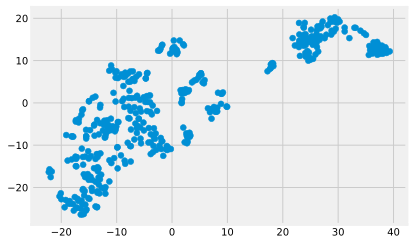

In [27]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

Задание 2
==
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

In [28]:
from sklearn.cluster import KMeans

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [29]:
kmeans = KMeans(max_iter = 100, random_state = 42, n_clusters = 3)
labels_train = kmeans.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

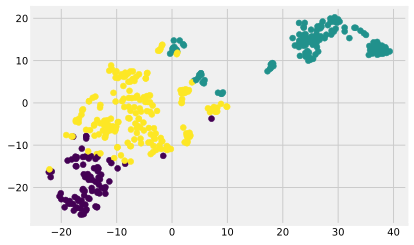

In [30]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

Вычислите средние значения price и CRIM в разных кластерах.

In [31]:
means = pd.DataFrame({
    'cluster': np.unique(labels_train),
    'price_mean': [float(y_train[labels_train==cluster].mean()) for cluster in np.unique(labels_train)],
    'CRIM_mean': [float(X_train.loc[labels_train==cluster, 'CRIM'].mean()) for cluster in np.unique(labels_train)],
})
means

,cluster,price_mean,CRIM_mean
0,0,27.788372,0.073566
1,1,16.165354,10.797028
2,2,24.958115,0.421660


Задание 3*
==
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

In [32]:
labels_test = kmeans.predict(X_test_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

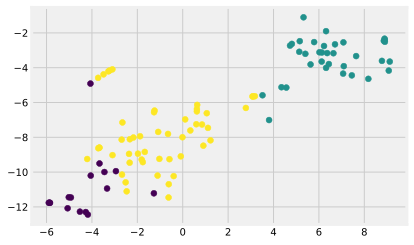

In [33]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [34]:
means_test = pd.DataFrame({
    'cluster': np.unique(labels_test),
    'price_mean': [float(y_test[labels_test==cluster].mean()) for cluster in np.unique(labels_test)],
    'CRIM_mean': [float(X_test.loc[labels_test==cluster, 'CRIM'].mean()) for cluster in np.unique(labels_test)],
})
means_test

,cluster,price_mean,CRIM_mean
0,0,31.350000,0.062060
1,1,16.437143,10.165531
2,2,21.860784,0.266079
